# Assignment 3: Non-Linear Models and Validation Metrics (50 marks total)
### Due: March 9 at 11:59pm

### Name: Maryam Alsayed

### In this assignment, you will need to write code that uses non-linear models to perform classification and regression tasks. You will also be asked to describe the process by which you came up with the code. More details can be found below. Please cite any websites or AI tools that you used to help you with this assignment.

## Part 1: Classification (30 marks)

### *Part 1A: Decision Function* 

Building on the first part of the previous assignment, we would like to test how changing the decision boundary for a linear model impacts the results.

### Step 0: Import Libraries

In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [185]:
import warnings
warnings.filterwarnings('ignore') #ignoring some deprication warnings

### Step 1: Data Input (1 mark)

Load spam data using the same method as assignment 2.

In [194]:
# TO DO: Import spam dataset from yellowbrick library
import yellowbrick
from yellowbrick.datasets import load_spam

X, y = load_spam()

Next, we need to split the data into training and testing sets.

In [195]:
# TO DO: Split 10% of the data for the testing set (1 mark)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

### Step 2: Data Processing
Based on assignment 2, follow the same data processing steps (if needed)

In [196]:
# TO DO: Data processing steps (if needed)
X.info()
# No null columns, no need to drop

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4600 non-null   float64
 1   word_freq_address           4600 non-null   float64
 2   word_freq_all               4600 non-null   float64
 3   word_freq_3d                4600 non-null   float64
 4   word_freq_our               4600 non-null   float64
 5   word_freq_over              4600 non-null   float64
 6   word_freq_remove            4600 non-null   float64
 7   word_freq_internet          4600 non-null   float64
 8   word_freq_order             4600 non-null   float64
 9   word_freq_mail              4600 non-null   float64
 10  word_freq_receive           4600 non-null   float64
 11  word_freq_will              4600 non-null   float64
 12  word_freq_people            4600 non-null   float64
 13  word_freq_report            4600 

### Step 3: Implement Machine Learning Model (2 marks)

1. Import `LogisticRegression` from sklearn
1. Instantiate model `LogisticRegression(max_iter=2000)`
1. Split training data into training and validation sets (use 20% of the data for validation)
1. Train the machine learning model

In [197]:
# TO DO: Split training data into training and validation sets and fit model to training data (2 marks)
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter = 2000)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
model.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

### Step 4-5: Validate Model and Visualize Results (4 marks)

Next, we can print the classification report and confusion matrix for this data set using the training and validation data.

In [198]:
# TO DO: Print classification report (1 mark)
from sklearn.metrics import classification_report

y_val_pred = model.predict(X_val)
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       555
           1       0.94      0.90      0.92       365

    accuracy                           0.94       920
   macro avg       0.94      0.93      0.93       920
weighted avg       0.94      0.94      0.94       920



Text(125.71000000000001, 0.5, 'Actual')

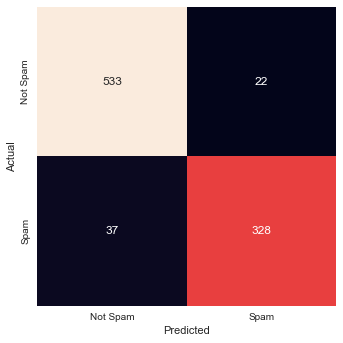

In [199]:
# TO DO: Print confusion matrix (1 mark)
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_val, y_val_pred)

sns.heatmap(matrix, xticklabels=["Not Spam", "Spam"], yticklabels = ["Not Spam", "Spam"], square=True, annot=True, cbar=False, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")

In this case, do we want to increase precision or recall? Based on your choice, select the appropriate direction to adjust the decision boundary. You can use either 1 or -1 as your new threshold, depending on your selected direction.

In [200]:
# TO DO: Predict values based on new decision function threshold and print classification report (1 mark)
y_val_probability = model.predict_proba(X_val)[:, 1]

new_y_val = (y_val_probability >= 0.4).astype(int) # 0.4 = new threshold

print(classification_report(y_val, new_y_val))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       555
           1       0.92      0.93      0.92       365

    accuracy                           0.94       920
   macro avg       0.93      0.94      0.93       920
weighted avg       0.94      0.94      0.94       920



Text(125.71000000000001, 0.5, 'Actual')

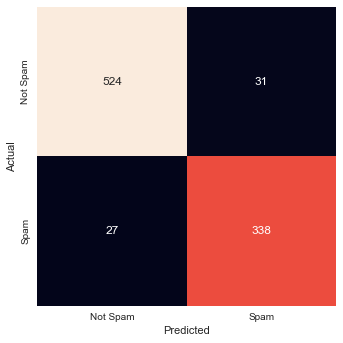

In [201]:
# TO DO: Print new confusion matrix (1 mark)
new_matrix = confusion_matrix(y_val, new_y_val)

sns.heatmap(new_matrix, xticklabels=["Not Spam", "Spam"], yticklabels = ["Not Spam", "Spam"], square=True, annot=True, cbar=False, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")

### Questions (6 marks)
1. Did you decide to move the threshold to increase recall or precision? Why?
1. How did your decision impact the number of false negatives and false positives? What is a potential unintended consequence of changing the decision boundary in this context?
1. Why did we use the validation data instead of the test data to check the new decision threshold?

- I decided to decrease the threshold to increase recall. This is because the recall in the classification report was calculated lower than the other values when identifying spam, meaning the number of false negatives identified was proportionally higher. By moving the decision boundary to increase recall, I aimed to even out the precision and recall values for a more even split of false negatives vs. false postives identified.
- Moving the decision boundary did decrease the number of false negatives as intended, but it also increased the number of false positives identified (decreased precision). In this specific case, the unintended consequence stemming from this is the increase in the number of emails identified as spam, even when they are not spam. Prior to adjusting the decision boundary, a larger proportion of emails were being identified as not spam, even when they were spam, and fewer were being falsely flagged as spam.
- The validation data was used instead of the testing data as the testing data is not used to tune hyperparameters. This is so that the testing data can be used to properly showcase how the model would perform on fresh data.

### *Part 1B: Non-linear classification*

Using the spam dataset from part 1A, compare the performance of two non-linear models to the linear model used in assignment 2.

### Step 3: Implement Machine Learning Models

1. Import `LogisticRegression`, `SVC` and `RandomForestClassifier` from sklearn
2. Instantiate models as `LogisticRegression(max_iter=2000)`, `SVC()` and `RandomForestClassifier(random_state=0, max_depth=10)`
3. Implement the machine learning models using cross-validation (Step 4)

### Step 4: Validate Model 

Calculate the training and validation accuracy for the three different models mentioned in Step 3. For this case, you can use `cross_validate()` with `cv=5` and `scoring='accuracy'` to get the training and validation data for each of the three models and calculate the accuracy results.

### Step 5.1: Visualize Results (4 marks)

1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy
1. Add the training accuracy and validation accuracy for each model to the `results` DataFrame
1. Add the model names as the index for the DataFrame
1. Print `results`

In [167]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

logistic_model = LogisticRegression(max_iter = 2000)
svc_model = SVC()
forest_model = RandomForestClassifier(random_state=0, max_depth=10)

models = {"Logistic Regression": logistic_model, "SVC": svc_model, "Random Forest": forest_model}
results_dictionary = {}

for name, model in models.items():
    cv_results = cross_validate(model, X, y, cv = 5, scoring='accuracy', return_train_score = True)
    results_dictionary[name] = {
        "Training Accuracy": cv_results["train_score"].mean(),
        "Validation Accuracy": cv_results["test_score"].mean()
    }

results = pd.DataFrame(results_dictionary).T # transposed for easier reading
print(results)

                     Training Accuracy  Validation Accuracy
Logistic Regression           0.930978             0.912826
SVC                           0.716576             0.705435
Random Forest                 0.968641             0.925000


SVM is sensitive to feature ranges, so scaling may be needed. Look at the feature ranges and try using a scaling method to see if the SVM results are improved.

In [168]:
# TO DO: Look at the ranges for each feature (0.5 marks)
# Hint: there is a built-in pandas function that you can use to view the statistics of your data
X.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,...,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,0.104576,0.212922,0.280578,0.065439,0.312222,0.095922,0.114233,0.105317,0.090087,0.239465,...,0.031876,0.038583,0.139061,0.016980,0.268960,0.075827,0.044248,5.191827,52.170870,283.290435
std,0.305387,1.290700,0.504170,1.395303,0.672586,0.273850,0.391480,0.401112,0.278643,0.644816,...,0.285765,0.243497,0.270377,0.109406,0.815726,0.245906,0.429388,31.732891,194.912453,606.413764
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.275500,15.000000,95.000000
75%,0.000000,0.000000,0.420000,0.000000,0.382500,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.000000,0.188000,0.000000,0.314250,0.052000,0.000000,3.705250,43.000000,265.250000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,10.000000,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000


In [169]:
# TO DO: Implement scaling for SVM and print training and validation accuracies (1.5 marks)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

svm_scaled = make_pipeline(StandardScaler(), SVC())

svm_cross_val = cross_validate(svm_scaled, X, y, cv=5, scoring="accuracy", return_train_score=True)

print("SVM Training Accuracy w/ Scaling:", svm_cross_val["train_score"].mean())
print("SVM Validation Accuracy w/ Scaling:", svm_cross_val["test_score"].mean())

SVM Training Accuracy w/ Scaling: 0.9490217391304349
SVM Validation Accuracy w/ Scaling: 0.9232608695652175


Which model gave us the best results? Use that model for the next section.

### Step 5.2: Visualize Classification Errors (3 marks)

In this section, print the classification report and confusion matrix to investigate the recall vs. precision for the best model. Use the full training set and testing set for this analysis.

In [170]:
# TO DO: Train model and find predicted values for testing set using best model (1 mark)
model = RandomForestClassifier(random_state=0, max_depth=10)
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)

In [171]:
# TO DO: Print classification report (1 mark)
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       263
           1       0.98      0.93      0.95       197

    accuracy                           0.96       460
   macro avg       0.96      0.96      0.96       460
weighted avg       0.96      0.96      0.96       460



Text(125.71000000000001, 0.5, 'Actual')

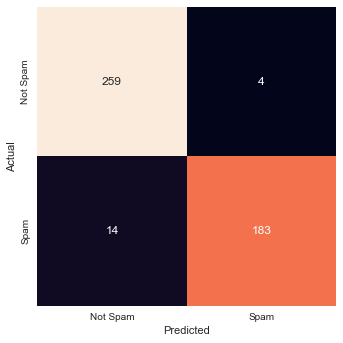

In [172]:
# TO DO: Print confusion matrix using a heatmap (1 mark)
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, y_test_pred)

sns.heatmap(matrix, xticklabels=["Not Spam", "Spam"], yticklabels = ["Not Spam", "Spam"], square=True, annot=True, cbar=False, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")

### Questions (6 marks)
1. Which model did you select for part 5.2? How did it compare to the other models? 
1. Looking at the feature ranges, would a tree-based model or SVM make more sense for this dataset? Did using scaling for SVM improve the results? How did it perform compared to the random forest model?
1. In your opinion, is it better to focus on changing the decision threshold or changing the model to improve precision/recall results? Why?

- I selected the Random Forest model as it provided the highest training and validation accuracy (0.97 & 0.93 respectively). The accuracies of the random forest model beat the accuracies of both logistic regression and SVM, even after scaling.
- In this case, a tree-based model is more fitting for the dataset. This is because tree-based models are insensitive to feature scaling. As seen above, using scaling for SVM did improve the results, however, they were still not as accurate as the results of the random forest model.
- Judging by the results from this dataset, changing the model appeared to be a better decision when trying to improve precision/recall. Both the precision and recall were higher after the model was changed, even when compared to the previous set after the decision threshold was changed. In my opinion, the best model should be prioritized, then the decision boundary can be moved to adjust the precision and recall values.

### Process Description (4 marks)
Please describe the process you used to create your code for parts A and B. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

1. I sourced my code from the previous assignment, lecture slides, and sklearn documentation. I used generative AI in part 1A to better understand how to move the decision threshold.
2. I completed the steps in the order they were listed.
3. I provided the generative AI with the classification report and the specific task (moving the decision threshold). More specifically, I prompted it to use the information in the classification report to move the decision threshold in order to increase the recall. Since I was only using it for one line of code, I did not need to modify its response.
4. Aside from the confusion around how to move the decision threshold, I did not experience hurdles. The content of the lecture slides and the reference of the previous assignment alongside sklearn documentation felt sufficient to complete the exercises.

## Part 2: Regression (18 marks)

For this section, we will be using the concrete example from yellowbrick. Since this dataset is highly non-linear, we will be evaluating how well different tree-based models work for this case.

You will need to repeat the steps from Part 1 for this analysis.

### Step 1: Data Input (1 mark)

The data used for this task can be imported using the yellowbrick library: 
https://www.scikit-yb.org/en/latest/api/datasets/concrete.html

Use the yellowbrick function `load_concrete()` to load the concrete dataset into the feature matrix `X` and target vector `y`.

In [173]:
# TO DO: Import concrete dataset from yellowbrick library (1 mark)
from yellowbrick.datasets import load_concrete

X, y = load_concrete()

### Step 2: Data Processing (1 mark)

Check if there are any missing values and fill them in if necessary. Remove any non-numeric columns.

In [174]:
# TO DO: Process the data - fill-in any missing values and remove any non-numeric columns (0.5 marks)
X.info()
# All columns are numeric, no missing values needed to fill

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cement  1030 non-null   float64
 1   slag    1030 non-null   float64
 2   ash     1030 non-null   float64
 3   water   1030 non-null   float64
 4   splast  1030 non-null   float64
 5   coarse  1030 non-null   float64
 6   fine    1030 non-null   float64
 7   age     1030 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 64.5 KB


The concrete data should already be split into the feature matrix and target vector. Inspect the first few columns of the feature matrix.

In [175]:
# TO DO: Inspect the first few rows of the feature matrix (0.5 marks)

data = pd.DataFrame(X)
data.head()

,cement,slag,ash,water,splast,coarse,fine,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


### Step 3: Implement and Validate Machine Learning Model (7 marks)

1. Import any required libraries
1. Split the data into training and testing sets (testing data should be 10% of the dataset)
1. Train and validate the Decision Tree model with the training set (use `cross_validate()` with `cv=5` and `scoring='r2'`)
    1. Test five different max_depth values: 3, 5, 7, 9 and 11
1. Print the training and validation accuracy for the best max_depth results. Which max_depth gave us the best results?

**Note**: for any random state parameters, you can use random_state = 0

In [176]:
# Split training and testing sets (1 mark)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=0)

In [177]:
# Test max_depths of 3, 5, 7, 9 and 11 for a decision tree model to find the best results (3 marks)
# Hint: It is easier if you use a loop to evaluate each max_depth
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate
max_depth = [3, 5, 7, 9, 11]

best_score = 0

for depth in max_depth:
    model = DecisionTreeRegressor(max_depth = depth, random_state = 0)
    scores = cross_validate(model, X_train, y_train, cv=5, scoring='r2', return_train_score=True)
    
    train_score = np.mean(scores['train_score'])
    val_score = np.mean(scores['test_score'])
    
    if val_score > best_score:
        best_score = val_score
        best_depth = depth
        
print(f"Best depth: {best_depth} has r2 score {best_score}")

Best depth: 9 has r2 score 0.8115408757428465


Now that we have found the best results for a decision tree model with this dataset, let's compare this result to using `Random_Forest` or `GradientBoosting`. For both models, use `max_depth=5`.

In [178]:
# TO DO: Calculate and display training and validation accuracies for both models using default hyperparameters (3 marks)
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

forest_model = RandomForestRegressor(max_depth=5, random_state=0)
gradient_model = GradientBoostingRegressor(max_depth = 5, random_state = 0)

forest_scores = cross_validate(forest_model, X_train, y_train, cv=5, scoring='r2', return_train_score=True)
gradient_scores = cross_validate(gradient_model, X_train, y_train, cv=5, scoring='r2', return_train_score=True)

forest_train_score = np.mean(forest_scores['train_score'])
forest_val_score = np.mean(forest_scores['test_score'])
gradient_train_score = np.mean(gradient_scores['train_score'])
gradient_val_score = np.mean(gradient_scores['test_score'])

print(f"Random Forest train r2 score: {forest_train_score}, validation r2 score: {forest_val_score}")
print(f"Gradient Boosting train r2 score: {gradient_train_score}, validation r2 score: {gradient_val_score}")

Random Forest train r2 score: 0.8869824832103032, validation r2 score: 0.8194981337681497
Gradient Boosting train r2 score: 0.9869128375083458, validation r2 score: 0.9199904991957876


Which model gave us the best results? Use that model for the next step.

### Step 4: Test Model (1 mark)

Select the best model and calculate the testing accuracy using the R^2 score

In [179]:
# TO DO: Find test score using best model (1 mark)
from sklearn.metrics import r2_score

model = GradientBoostingRegressor(max_depth = 5, random_state = 0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("R2 score:", r2)

R2 score: 0.9194056219679196


### Questions (4 marks)
1. Out of the models you tested, which model would you select for this dataset and why?
1. If you wanted to increase the accuracy of the tree-based models, what would you do? Provide two suggestions.

- Out of the models tested, I would select the gradient boosting model due to the high r2 score in training, validation, and testing accuracies when compared to the other models.
- To increase the accuracy of the other tree-based models, hyperparameters can be adjusted. Two hyperparameters to adjust to increase accuracy would be n_estimators and max_features.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

1. I sourced my code from the lecture examples and sklearn documentation. I also used generative AI to confirm my work and make it more concise if I found it to be messy.
2. I completed the steps in the order that they were listed.
3. To prompt the AI, I provided it with relevant details (i.e. classification reports, r2 scores, etc.) as well as the instructions given to see how it completed certain steps. I did not need to modify the code as I mainly used it as a comparison or to make my own code more concise.
4. I did not face many challenges in this section as I found that part 1A and 1B prepared me well for the basics of this section. I also found that reviewing the relevant information in the lecture slides alongside each new instruction was very helpful in increasing my own understanding of the content as well as what was being asked in each step.

## Part 3: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challenging, motivating
while working on this assignment.


- I appreciated the step-by-step layout and the clarity of where each mark in the assignment came from. I was interested and motivated by how this assignment built on the previous one as it provided me with a better understanding of the machine learning workflow and how it builds upon itself. I was initially confused by how to implement the scaling for SVM, but was able to use various resources to understand and complete the exercise.